In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from matplotlib import pyplot as plt
from efficient_esm.models.esmfold import ESMFold

In [3]:
device = "cuda"
esm_path = "../data/esm2_t36_3B_UR50D.pt"
esmfold_path = "../data/esmfold_structure_module_only_3B.pt"

In [6]:
model = ESMFold.load(esmfold_path, esm_path).to(device)

In [8]:
seq = "ASAWPEEKNYHQPAILNSSALRQIAEGTSISEMWQNDLQPLLIERYPGSPGSYAARQHIMQRIQRLQADWVLEIDTFLSQTPYGYRSFSNIISTLNPTAKRHLVLACHYDSKYFSHWNNRVFVGATDSAVPCAMMLELARALDKKLLSLKTVSDSKPDLSLQLIFFDGEEAFLHWSPQDSLYGSRHLAAKMASTPHPPGARGTSQLHGMDLLVLLDLIGAPNPTFPNFFPNSARWFERLQAIEHELHELGLLKDHSLEGRYFQNYSYGGVIQDDHIPFLRRGVPVLHLIPSPFPEVWHTMDDNEENLDESTIDNLNKILQVFVLEYLHL"

In [9]:
model.eval()
with torch.no_grad():
    out = model.infer(seq)

In [16]:
p_ca = out["positions"][-1, 0, :, 1]
plddt = out["mean_plddt"].item()
print(f"{plddt:.2f}")

71.43


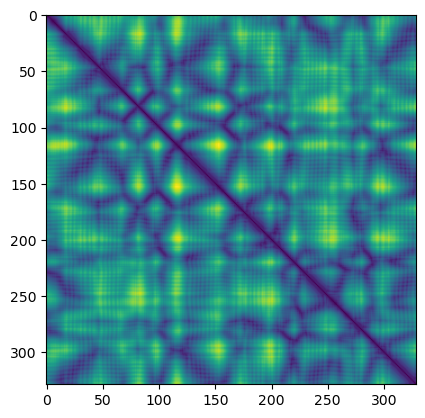

In [17]:
p_ca = out["positions"][-1, 0, :, 1]
dist = torch.cdist(p_ca, p_ca).cpu().numpy()
plt.imshow(dist)

In [20]:
with open("out.pdb", "w") as f:
    f.writelines(model.output_to_pdb(out))